In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
trainDF = pd.read_csv('train.csv')
trainDF.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
falseDF=trainDF[trainDF['Response']==0]
trueDF = trainDF[trainDF['Response']==1]
trainDF2 = pd.concat((trueDF,falseDF[:len(trueDF)]))
trainDF2 = trainDF2.reset_index(drop=True)
trainDF2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
1,7,Female,47,1,8.0,0,1-2 Year,Yes,40659.0,26.0,262,1
2,28,Male,40,1,35.0,0,1-2 Year,Yes,2630.0,157.0,204,1
3,36,Female,50,1,46.0,0,1-2 Year,Yes,29248.0,124.0,273,1
4,44,Male,40,1,8.0,0,1-2 Year,Yes,36217.0,124.0,286,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2830113,1612746,Male,52,1,46.0,0,1-2 Year,Yes,2630.0,156.0,91,0
2830114,1612747,Female,21,1,36.0,1,< 1 Year,No,44195.0,152.0,250,0
2830115,1612748,Male,31,1,35.0,1,< 1 Year,No,20554.0,152.0,254,0
2830116,1612749,Female,22,1,41.0,0,< 1 Year,Yes,27827.0,160.0,60,0


In [4]:
testDF = pd.read_csv('test.csv')
testDF.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [5]:
# concatDF = pd.concat([trainDF,testDF])
concatDF = pd.concat([trainDF2,testDF])

concatDF.loc[concatDF['Gender']=='Male',['Gender']]=0
concatDF.loc[concatDF['Gender']=='Female',['Gender']]=1
concatDF['Gender']=concatDF['Gender'].astype(float)

concatDF['Age']=concatDF['Age']/concatDF['Age'].max()

concatDF.loc[concatDF['Vehicle_Age']=='< 1 Year',['Vehicle_Age']]=0
concatDF.loc[concatDF['Vehicle_Age']=='1-2 Year',['Vehicle_Age']]=0.5
concatDF.loc[concatDF['Vehicle_Age']=='> 2 Years',['Vehicle_Age']]=1
concatDF['Vehicle_Age']=concatDF['Vehicle_Age'].astype(float)

concatDF['Annual_Premium']=concatDF['Annual_Premium']/concatDF['Annual_Premium'].max()

concatDF['Vintage']=concatDF['Vintage']/concatDF['Vintage'].max()

concatDF.loc[concatDF['Vehicle_Damage']=='No',['Vehicle_Damage']]=0
concatDF.loc[concatDF['Vehicle_Damage']=='Yes',['Vehicle_Damage']]=1

concatDF['Vehicle_Damage']=concatDF['Vehicle_Damage'].astype(float)

concatDF['id']=concatDF['id'].astype(str)

concatDF['Driving_License']=concatDF['Driving_License'].astype(float)

concatDF['Previously_Insured']=concatDF['Previously_Insured'].astype(float)


print(concatDF.info())
concatDF.head()


<class 'pandas.core.frame.DataFrame'>
Index: 10499984 entries, 0 to 7669865
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    object 
 1   Gender                float64
 2   Age                   float64
 3   Driving_License       float64
 4   Region_Code           float64
 5   Previously_Insured    float64
 6   Vehicle_Age           float64
 7   Vehicle_Damage        float64
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               float64
 11  Response              float64
dtypes: float64(11), object(1)
memory usage: 1.0+ GB
None


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.0,0.505882,1.0,28.0,0.0,1.0,1.0,0.109061,26.0,0.963211,1.0
1,7,1.0,0.552941,1.0,8.0,0.0,0.5,1.0,0.075271,26.0,0.876254,1.0
2,28,0.0,0.470588,1.0,35.0,0.0,0.5,1.0,0.004869,157.0,0.682274,1.0
3,36,1.0,0.588235,1.0,46.0,0.0,0.5,1.0,0.054146,124.0,0.913043,1.0
4,44,0.0,0.470588,1.0,8.0,0.0,0.5,1.0,0.067048,124.0,0.956522,1.0


In [6]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [7]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, df:pd.DataFrame):
        self.id = df['id'].values
        df= df.drop(columns=['id'])

        if 'Response' in df.columns:
            self.response = pd.get_dummies(df['Response']).astype(float).values
            # self.response = 
            df= df.drop(columns=['Response'])

        # df = pd.get_dummies(df,columns=['Region_Code','Policy_Sales_Channel'])
        df= df.drop(columns=['Region_Code','Policy_Sales_Channel'])
        self.data = df.values
        pass

    def __len__(self):
        return len(self.id)

    def __getitem__(self, idx):
        x=self.data[idx]
        x=torch.tensor(x)
        # x=x.to(torch.float32)
        x=x.to(device)

        id = self.id[idx]

        y=self.response[idx]
        y=torch.tensor(y)
        # y=y.to(torch.float32)
        y=y.to(device)

        return id, x, y

# trainSet= MyDataset(concatDF[:len(trainDF)])
trainSet= MyDataset(concatDF[:len(trainDF2)])
testSet= MyDataset(concatDF[len(trainDF2):])
trainSet[1]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jsh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jsh\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jsh\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.sta

('7',
 tensor([1.0000, 0.5529, 1.0000, 0.0000, 0.5000, 1.0000, 0.0753, 0.8763],
        device='cuda:0'),
 tensor([0., 1.], device='cuda:0'))

In [8]:
splitSet = torch.utils.data.random_split(trainSet,(0.7,0.3))
splitSet

In [9]:
trainLoader=torch.utils.data.DataLoader(splitSet[0],batch_size=1024,sampler=torch.utils.data.RandomSampler(splitSet[0]))
valLoader=torch.utils.data.DataLoader(splitSet[1],batch_size=1024,sampler=torch.utils.data.RandomSampler(splitSet[1]))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=1024)
trainLoader

In [10]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.convStack = torch.nn.Sequential(
            torch.nn.Linear(8, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 2),
        )

    def forward(self, x):
        logits = self.convStack(x)
        return logits

model = Net().to(device)
model

Net(
  (convStack): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
)

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(),lr=1)


In [12]:
# checkpoint = torch.load('model.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

[1] cnt: 0 - val loss: 357.96086913347244 - train loss: 850.0270337462425
[1] cnt: 0 - val loss: 355.78070643544197 - train loss: 831.3348417282104
[1] cnt: 0 - val loss: 353.8033612072468 - train loss: 825.8951990306377
[1] cnt: 1 - val loss: 354.15282195806503 - train loss: 823.645623922348
[1] cnt: 0 - val loss: 353.40530893206596 - train loss: 822.5484619140625
[1] cnt: 0 - val loss: 352.1708192229271 - train loss: 821.9900209605694
[1] cnt: 1 - val loss: 352.7925733625889 - train loss: 821.5926543772221
[1] cnt: 0 - val loss: 351.95160043239594 - train loss: 821.2263397574425
[1] cnt: 1 - val loss: 352.3056571185589 - train loss: 821.20437297225
[1] cnt: 2 - val loss: 352.635244756937 - train loss: 821.0278643965721
[1] cnt: 3 - val loss: 352.35903626680374 - train loss: 820.8912701904774
[1] cnt: 4 - val loss: 351.99427404999733 - train loss: 820.7723476290703
[1] cnt: 5 - val loss: 354.11636993288994 - train loss: 820.7261286079884
[1] cnt: 6 - val loss: 352.40756529569626 - tra

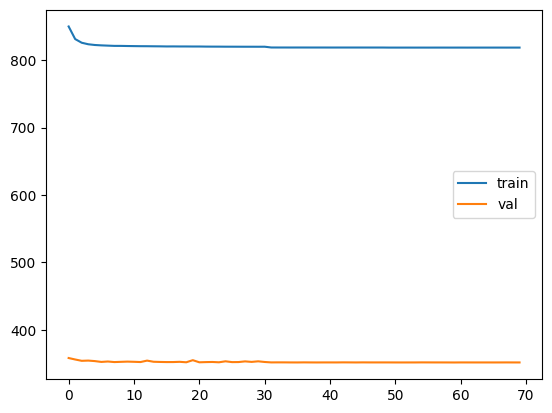

In [13]:
trainHistory=[]
valHistory=[]
lrScheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

for phase in range(3):
    bestLoss = float('inf')
    cnt = 0
    bestModel = model

    while(cnt<10):
        model.train()
        trainLoss=0
        for  _, x, y in trainLoader:
            # Compute prediction error
            pred = model(x)
            loss = loss_fn(pred, y)
            trainLoss +=loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        model.eval()
        valLoss=0
        with torch.no_grad():
            for _, x,y in valLoader:
                pred = model(x)
                loss = loss_fn(pred, y)
                valLoss+=loss.item()

        trainHistory.append(trainLoss)

        valHistory.append(valLoss)

        if bestLoss < valLoss:
            cnt +=1
        else:
            bestLoss = valLoss
            bestModel = model
            cnt =0 

        print(f'{lrScheduler.get_last_lr()} cnt: {cnt} - val loss: {valLoss} - train loss: {trainLoss}')

    model = bestModel
    lrScheduler.step()

plt.plot(trainHistory,label='train')
plt.plot(valHistory, label='val')
plt.legend() 

In [14]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for _, x, y  in valLoader:
        pred = model(x)

        for idx, i in enumerate(pred):
            if torch.argmax(i)== torch.argmax(y[idx]):
                correct +=1 
            total+=1
correct / total


0.7982332883803377

In [15]:
model.eval()
result = []
with torch.no_grad():
    for id, X, _ in testLoader:
        pred = model(X)
        for idx, i in enumerate(pred):
            result.append([id[idx], torch.argmax(i).item()])

result

[['11504798', 0],
 ['11504799', 1],
 ['11504800', 1],
 ['11504801', 0],
 ['11504802', 0],
 ['11504803', 0],
 ['11504804', 0],
 ['11504805', 0],
 ['11504806', 0],
 ['11504807', 0],
 ['11504808', 1],
 ['11504809', 0],
 ['11504810', 0],
 ['11504811', 0],
 ['11504812', 0],
 ['11504813', 0],
 ['11504814', 0],
 ['11504815', 0],
 ['11504816', 0],
 ['11504817', 0],
 ['11504818', 1],
 ['11504819', 1],
 ['11504820', 1],
 ['11504821', 1],
 ['11504822', 0],
 ['11504823', 1],
 ['11504824', 0],
 ['11504825', 0],
 ['11504826', 0],
 ['11504827', 0],
 ['11504828', 0],
 ['11504829', 0],
 ['11504830', 1],
 ['11504831', 0],
 ['11504832', 1],
 ['11504833', 1],
 ['11504834', 0],
 ['11504835', 1],
 ['11504836', 0],
 ['11504837', 0],
 ['11504838', 0],
 ['11504839', 1],
 ['11504840', 0],
 ['11504841', 0],
 ['11504842', 0],
 ['11504843', 1],
 ['11504844', 0],
 ['11504845', 0],
 ['11504846', 1],
 ['11504847', 0],
 ['11504848', 0],
 ['11504849', 0],
 ['11504850', 0],
 ['11504851', 1],
 ['11504852', 0],
 ['1150485

In [16]:
outDF= pd.DataFrame(result)
outDF= outDF.astype(int)
outDF.columns=['id','Response']
outDF

,id,Response
0,11504798,0
1,11504799,1
2,11504800,1
3,11504801,0
4,11504802,0
...,...,...
7669861,19174659,1
7669862,19174660,0
7669863,19174661,0
7669864,19174662,1


In [17]:
outDF.to_csv('result.csv',index=False)

In [18]:
torch.save(model.state_dict(), 'model.pt')